# Titanic: Machine Learning from Disaster

## Predict survival on the Titanic and get familiar with ML basics


The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.


## Data Fields

  * **Survival** - Survival. 0 = No, 1 = Yes
  * **Pclass** - Ticket class. 1 = 1st, 2 = 2nd, 3 = 3rd
  * **Sex** - Sex.
  * **Age** - Age in years.
  * **SibSp** - # of siblings / spouses aboard the Titanic.
  * **Parch** - # of parents / children aboard the Titanic.
  * **Ticket** - Ticket number.
  * **Fare** - Passenger fare.
  * **Cabin** - Cabin number.
  * **Embarked** - Port of Embarkation. C = Cherbourg, Q = Queenstown, S = Southampton


In [2]:
import pandas as pd

## Load Dataset

In [3]:
train = pd.read_csv("titanic_train.csv", index_col=["PassengerId"])

print(train.shape)
train.head()

(891, 11)


Survived  Pclass  \
PassengerId                     
1                   0       3   
2                   1       1   
3                   1       3   
4                   1       1   
5                   0       3   

                                                          Name     Sex   Age  \
PassengerId                                                                    
1                                      Braund, Mr. Owen Harris    male  22.0   
2            Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0   
3                                       Heikkinen, Miss. Laina  female  26.0   
4                 Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0   
5                                     Allen, Mr. William Henry    male  35.0   

             SibSp  Parch            Ticket     Fare Cabin Embarked  
PassengerId                                                          
1                1      0         A/5 21171   7.2500   NaN        S  
2                1      0          PC 17599  71.2833   C85        C  
3                0      0  STON/O2. 3101282   7.9250   NaN        S  
4                1      0            113803  53.1000  C123        S  
5                0      0            373450   8.0500   NaN        S

In [13]:
train.isnull().sum()

Survived        0
Pclass          0
Name            0
Sex             0
Age           177
SibSp           0
Parch           0
Ticket          0
Fare            0
Cabin         687
Embarked        2
Sex_encode      0
dtype: int64

In [4]:
test = pd.read_csv("test.csv", index_col=["PassengerId"])

print(test.shape)
test.head()

(418, 10)


Pclass                                          Name     Sex  \
PassengerId                                                                 
892               3                              Kelly, Mr. James    male   
893               3              Wilkes, Mrs. James (Ellen Needs)  female   
894               2                     Myles, Mr. Thomas Francis    male   
895               3                              Wirz, Mr. Albert    male   
896               3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

              Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
PassengerId                                                       
892          34.5      0      0   330911   7.8292   NaN        Q  
893          47.0      1      0   363272   7.0000   NaN        S  
894          62.0      0      0   240276   9.6875   NaN        Q  
895          27.0      0      0   315154   8.6625   NaN        S  
896          22.0      1      1  3101298  12.2875   NaN        S

## Preprocessing

### Encode Sex

In [5]:
train.loc[train["Sex"] == "male", "Sex_encode"] = 0
train.loc[train["Sex"] == "female", "Sex_encode"] = 1

print(train.shape)
train[["Sex", "Sex_encode"]].head()

(891, 12)


Sex  Sex_encode
PassengerId                    
1              male         0.0
2            female         1.0
3            female         1.0
4            female         1.0
5              male         0.0

In [6]:
test.loc[test["Sex"] == "male", "Sex_encode"] = 0
test.loc[test["Sex"] == "female", "Sex_encode"] = 1


print(test.shape)
test[["Sex", "Sex_encode"]].head()

(418, 11)


Sex  Sex_encode
PassengerId                    
892            male         0.0
893          female         1.0
894            male         0.0
895            male         0.0
896          female         1.0

### Fill in missing fare

In [7]:
mean_fare = train["Fare"].mean()

print("Fare(Mean) = ${0:.3f}".format(mean_fare))

Fare(Mean) = $32.204


In [10]:
test.loc[pd.isnull(test["Fare"]), "Fare"] = mean_fare
test[pd.isnull(test["Fare"])]

Empty DataFrame
Columns: [Pclass, Name, Sex, Age, SibSp, Parch, Ticket, Fare, Cabin, Embarked, Sex_encode]
Index: []

### Encode Embarked

In [8]:
train_embarked = pd.get_dummies(train["Embarked"], prefix="Embarked")

print(train_embarked.shape)
train_embarked.head()

(891, 3)


Embarked_C  Embarked_Q  Embarked_S
PassengerId                                    
1                     0           0           1
2                     1           0           0
3                     0           0           1
4                     0           0           1
5                     0           0           1

In [9]:
test_embarked = pd.get_dummies(test["Embarked"], prefix="Embarked")

print(test_embarked.shape)
test_embarked.head()

(418, 3)


Embarked_C  Embarked_Q  Embarked_S
PassengerId                                    
892                   0           1           0
893                   0           0           1
894                   0           1           0
895                   0           0           1
896                   0           0           1

In [10]:
train = pd.concat([train, train_embarked], axis=1)

print(train.shape)
train[["Embarked", "Embarked_C", "Embarked_Q", "Embarked_S"]].head()

(891, 15)


Embarked  Embarked_C  Embarked_Q  Embarked_S
PassengerId                                             
1                  S           0           0           1
2                  C           1           0           0
3                  S           0           0           1
4                  S           0           0           1
5                  S           0           0           1

In [11]:
test = pd.concat([test, test_embarked], axis=1)

print(test.shape)
test[["Embarked", "Embarked_C", "Embarked_Q", "Embarked_S"]].head()

(418, 14)


Embarked  Embarked_C  Embarked_Q  Embarked_S
PassengerId                                             
892                Q           0           1           0
893                S           0           0           1
894                Q           0           1           0
895                S           0           0           1
896                S           0           0           1

## Train

In [12]:
feature_names = ["Pclass", "Sex_encode", "Fare",
                 "Embarked_C", "Embarked_Q", "Embarked_S"]

X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(891, 6)


Pclass  Sex_encode     Fare  Embarked_C  Embarked_Q  Embarked_S
PassengerId                                                                 
1                 3         0.0   7.2500           0           0           1
2                 1         1.0  71.2833           1           0           0
3                 3         1.0   7.9250           0           0           1
4                 1         1.0  53.1000           0           0           1
5                 3         0.0   8.0500           0           0           1

In [13]:
label_name = "Survived"

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(891,)


PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [14]:
from sklearn.tree import DecisionTreeClassifier

seed = 37

model = DecisionTreeClassifier(max_depth=5,
                               random_state=seed)

In [15]:
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn import svm  # support vector Machine
from sklearn.ensemble import RandomForestClassifier # Random Forest
from sklearn.tree import DecisionTreeClassifier # Decision Tree
from sklearn.model_selection import train_test_split #training and testing data split
from sklearn import metrics #accuracy measure

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [16]:
# model = LogisticRegression()

model = RandomForestClassifier(n_estimators=340, random_state=31)

In [17]:
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=37,
            splitter='best')

## Visualize

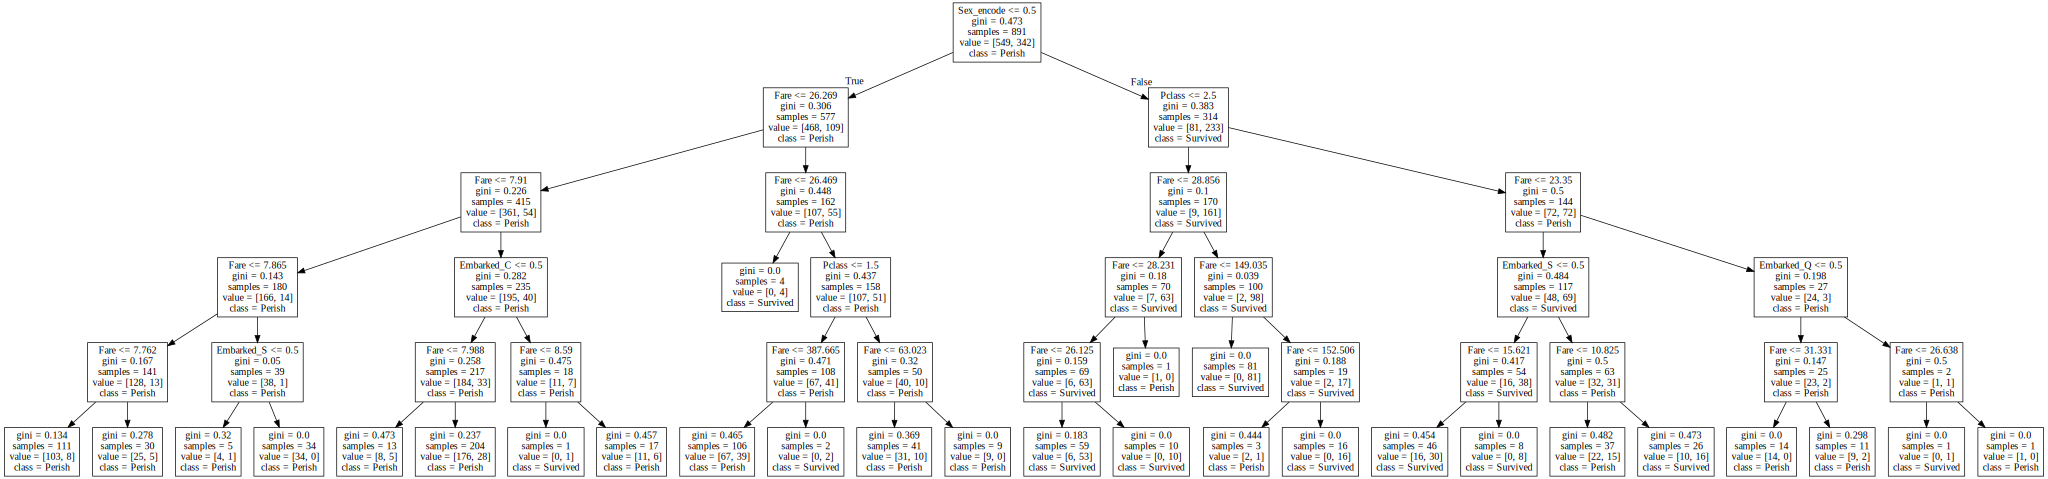

In [18]:
# Warning: You should install graphviz before run these codes.
# 1) Download Graphviz - http://www.graphviz.org/Download.php
# 2) install graphviz - 'pip install graphviz' or install graphviz from Anaconda Navigator.

from sklearn.tree import export_graphviz
import graphviz

export_graphviz(model,
                feature_names=feature_names,
                class_names=["Perish", "Survived"],
                out_file="decision-tree.dot")

with open("decision-tree.dot") as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)

## Predict

In [19]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(418, 6)


Pclass  Sex_encode     Fare  Embarked_C  Embarked_Q  Embarked_S
PassengerId                                                                 
892               3         0.0   7.8292           0           1           0
893               3         1.0   7.0000           0           0           1
894               2         0.0   9.6875           0           1           0
895               3         0.0   8.6625           0           0           1
896               3         1.0  12.2875           0           0           1

In [20]:
prediction = model.predict(X_test)

print(prediction.shape)
prediction[:20]

(418,)


array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1])

## Submit

In [21]:
import numpy as np
submission = pd.read_csv("data/titanic/gender_submission.csv", index_col="PassengerId")

submission["Survived"] = prediction.astype(np.int32)

print(submission.shape)
submission.head()

(418, 1)


Survived
PassengerId          
892                 0
893                 0
894                 0
895                 0
896                 1

In [22]:
submission.to_csv("baseline-script.csv")